# Using Different Moves

We allow users to select different Hamiltonian & Vanilla moves.
Due to the different structure of Hamiltonian samplers, and derivative-free samplers, we separate the moves into two categories: Hamiltonian moves and Vanilla moves.

- **Hamiltonian Moves**: These moves require gradient information of the log-probability function. Examples include the Hamiltonian Walk Move and Hamiltonian Side Move. You can access such moves in `hemcee.moves.hamiltonian`.
- **Vanilla Moves**: These moves do not require gradient information and are suitable for derivative-free samplers. Examples include the Stretch Move and Walk Move. You can access such moves in `hemcee.moves.vanilla`.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import hemcee

import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)

import numpy as np

import time
import corner

In the test files, we have built in example distributions to play around with

In [10]:
from hemcee.tests.distribution import make_gaussian_skewed, make_rosenbrock, make_allen_cahn
key = jax.random.PRNGKey(1)
dim = 5

total_chains = dim * 6

cond_number = 100
log_prob = make_gaussian_skewed(key, dim, cond_number)
# log_prob = make_rosenbrock(key)
# log_prob = make_allen_cahn(lattice_spacing=0.01)

## Hamiltonian Ensemble Moves
Here's your options for Hamiltonian moves, and how to change them! We default to the `hmc_walk_move`.

In [11]:
from hemcee.moves.hamiltonian.hmc_walk import hmc_walk_move
from hemcee.moves.hamiltonian.hmc_side import hmc_side_move

In [12]:
sampler = hemcee.HamiltonianEnsembleSampler(
    total_chains= total_chains,
    dim=dim,
    log_prob=log_prob,
    move=hmc_walk_move, # <- Plug and play different moves here!
    L=10,
    step_size=0.1,
)  

keys = jax.random.split(key, 2)
inital_states = jax.random.normal(keys[0], shape=(total_chains, dim))

start = time.time()
samples = sampler.run_mcmc(
    key=keys[1],
    initial_state=inital_states,
    num_samples=10**5,
    warmup=10**5,
    show_progress=True,
)
end = time.time()

### Metrics
print(f"Time taken: {end - start} seconds")
print('Acceptance rates of chains:')
print(sampler.diagnostics_main['acceptance_rate'])

# You can compare the performance of different moves 
# by computing the integrated autocorrelation time
tau = hemcee.autocorr.integrated_time(samples)
print('Integrated autocorrelation time:')
print(tau)

Using 30 total chains: Group 1 (15), Group 2 (15)
Starting warmup...


100%|██████████| 1516/1516 [00:11<00:00, 128.30it/s]


Warmup complete.
Starting main sampling...


100%|██████████| 1516/1516 [00:10<00:00, 138.10it/s]


Main sampling complete.
Time taken: 23.207108974456787 seconds
Acceptance rates of chains:
[0.80075 0.79768 0.79697 0.79611 0.7985  0.79733 0.80019 0.79807 0.79897
 0.7969  0.80027 0.79937 0.79802 0.79776 0.7972  0.80121 0.79785 0.79854
 0.796   0.79723 0.79534 0.79709 0.79751 0.79881 0.7991  0.8018  0.79646
 0.7968  0.79752 0.79568]
Integrated autocorrelation time:
[1.56058661 1.56242479 1.56135676 1.56392677 1.56247462]


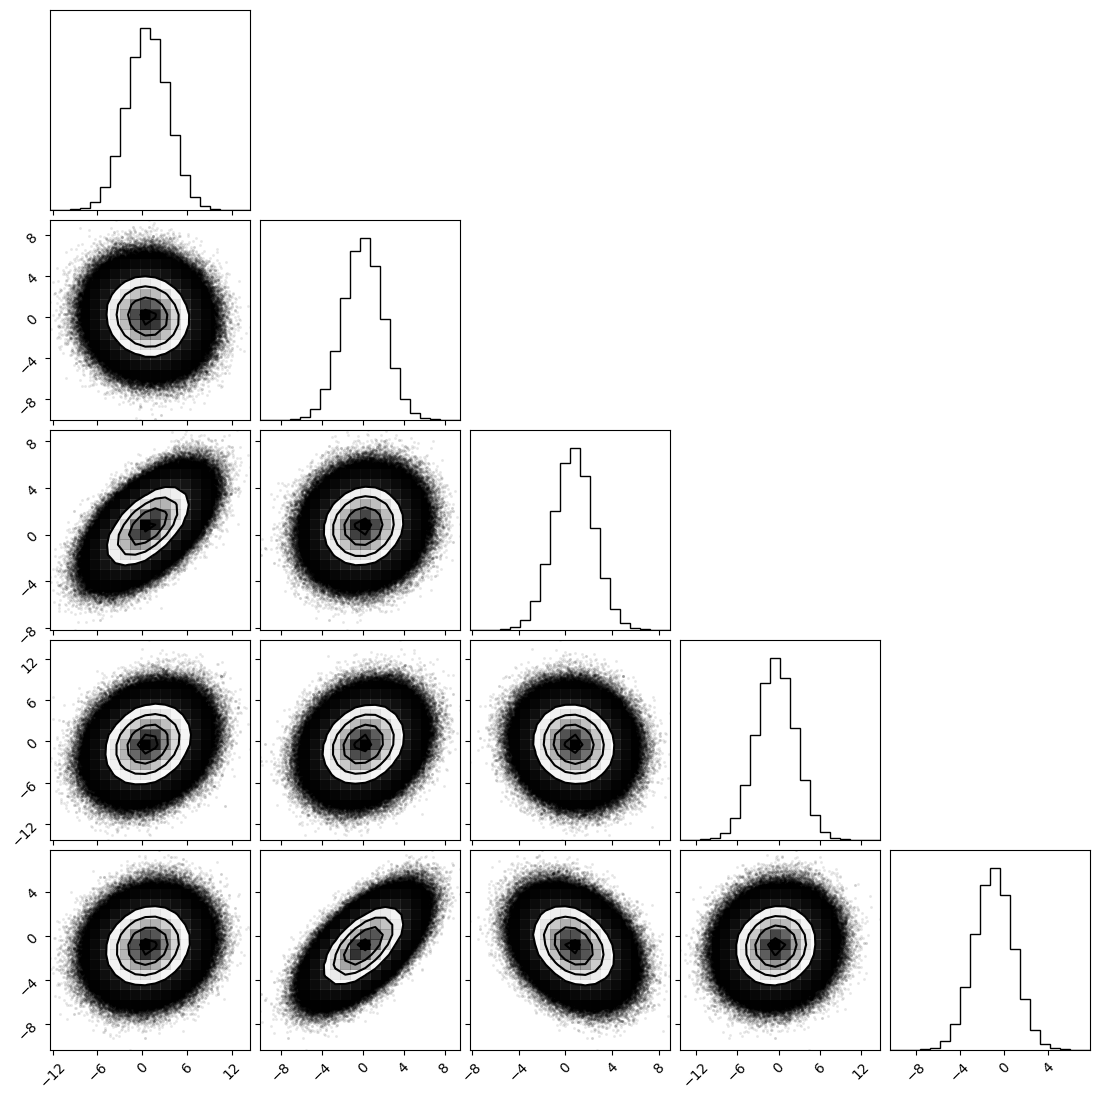

In [15]:
_ = corner.corner(np.array(samples).reshape(-1, dim),)

## (Derivative-Free) Ensemble Moves
The same syntax goes for derivative-free moves. We default to the `stretch_move`, which is the default move in `emcee`.

In [ ]:
from hemcee.moves.vanilla.stretch import stretch_move # This is the default move in `emcee` and in our package.
from hemcee.moves.vanilla.side import side_move
from hemcee.moves.vanilla.walk import walk_move

In [9]:
sampler = hemcee.EnsembleSampler(
    total_chains=total_chains,
    dim=dim,
    log_prob=log_prob,
    move=side_move # <- Plug and play different moves here!
)

keys = jax.random.split(key, 2)
inital_states = jax.random.normal(keys[0], shape=(total_chains, dim))

start = time.time()
samples = sampler.run_mcmc(
    key=keys[1],
    initial_state=inital_states,
    num_samples=10**5,
    warmup=10**6,
    thin_by=1,
    show_progress=True,
)
end = time.time()


### Metrics
print(f"Time taken: {end - start} seconds")

print('Acceptance rates of chains:')
print(sampler.diagnostics_main['acceptance_rate'])

print('Integrated autocorrelation time:')
tau = hemcee.autocorr.integrated_time(samples)
print(tau)

Using 20 total chains: Group 1 (10), Group 2 (10)


Batched Scan: 100%|██████████| 4400/4400 [00:30<00:00, 143.81it/s]


Time taken: 31.35976505279541 seconds
Acceptance rates of chains:
[0.15158818 0.15253182 0.15305    0.15059    0.15266727 0.15241182
 0.15229818 0.15141818 0.15238091 0.15297727 0.15079091 0.15182818
 0.15168364 0.15244909 0.15215273 0.15058545 0.15230455 0.1516
 0.15072364 0.15164818]
Integrated autocorrelation time:
[171.25950497 230.15469897]


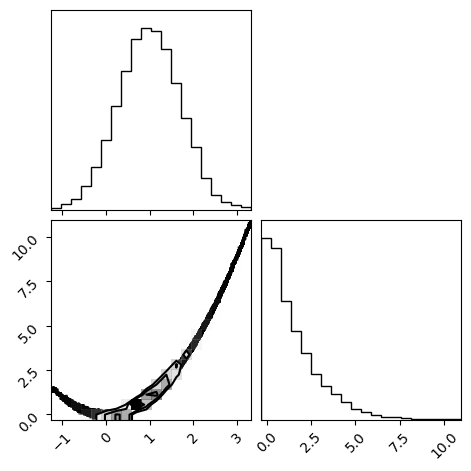

In [10]:
_ = corner.corner(np.array(samples).reshape(-1, dim))

## Regular Hamiltonian Sampler

In [19]:
sampler = hemcee.HamiltonianSampler(
    total_chains= total_chains,
    dim=dim,
    log_prob=log_prob,
    L=10,
)  

keys = jax.random.split(key, 2)
inital_states = jax.random.normal(keys[0], shape=(total_chains, dim))

start = time.time()
samples = sampler.run_mcmc(
    key=keys[1],
    initial_state=inital_states,
    num_samples=10**5,
    warmup=0,
    show_progress=True,
)
end = time.time()

### Metrics
print(f"Time taken: {end - start} seconds")
print('Acceptance rates of chains:')
print(sampler.diagnostics_main['acceptance_rate'])

# You can compare the performance of different moves 
# by computing the integrated autocorrelation time
tau = hemcee.autocorr.integrated_time(samples)
print('Integrated autocorrelation time:')
print(tau)

Using 20 total chains


Batched Scan: 100%|██████████| 400/400 [00:01<00:00, 218.35it/s]


Time taken: 1.8904447555541992 seconds
Acceptance rates of chains:
[0.86958 0.87049 0.87302 0.87073 0.86875 0.86993 0.87119 0.87064 0.87143
 0.87359 0.87216 0.8712  0.87274 0.87109 0.86833 0.87176 0.87034 0.87059
 0.87244 0.87094]
Integrated autocorrelation time:
[10.160482 10.115066]
